# 8. Decision Tree Method

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']
feature_names = X.columns.tolist()  # Get feature names from the dataset

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7402597402597403


Then we try to plot the decision tree

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- BloodPressure <= 37.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  37.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- SkinThickness <= 8.50
|   |   |   |   |   |   |--- Glucose <= 109.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Glucose >  109.50
|   |   |   |   |   |   |   |--- BMI <= 32.45
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- BMI >  32.45
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- SkinThickness >  8.50
|   |   |   |   |  

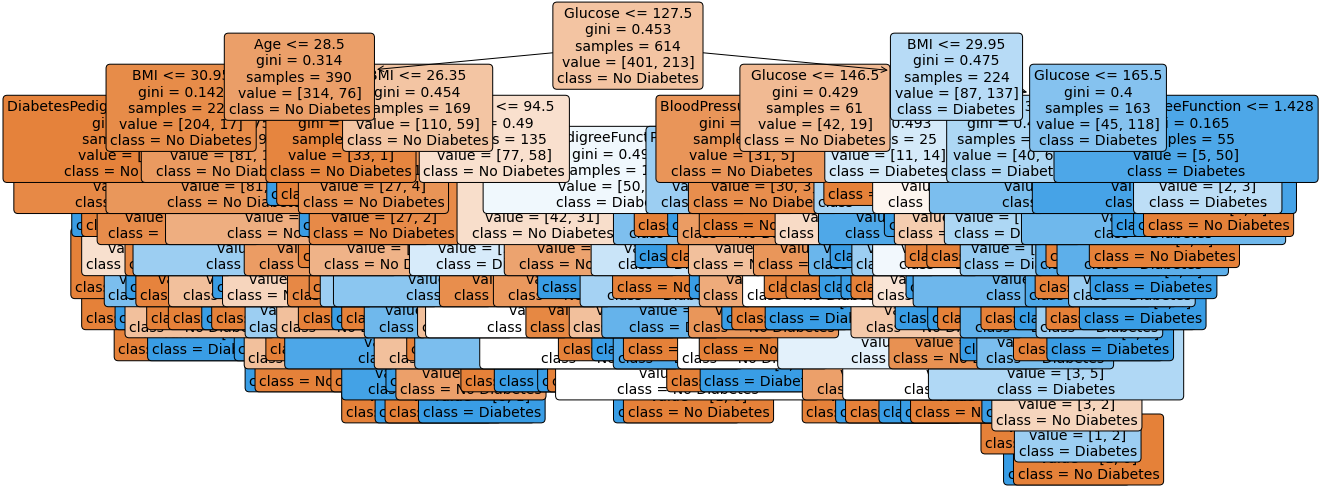

In [7]:
# Export the decision tree rules
tree_rules = export_text(dt_classifier, feature_names=feature_names)
print(tree_rules, "\n")

# Plot the decision tree
plt.figure(figsize=(20, 8))
plot_tree(dt_classifier, feature_names=feature_names, class_names=['No Diabetes', 'Diabetes'], rounded=True, filled=True, fontsize=14)
plt.show()

Then in the next step, we need to evaluate the tree.

Accuracy: 0.7402597402597403
Confusion Matrix:
[[77 22]
 [18 37]]


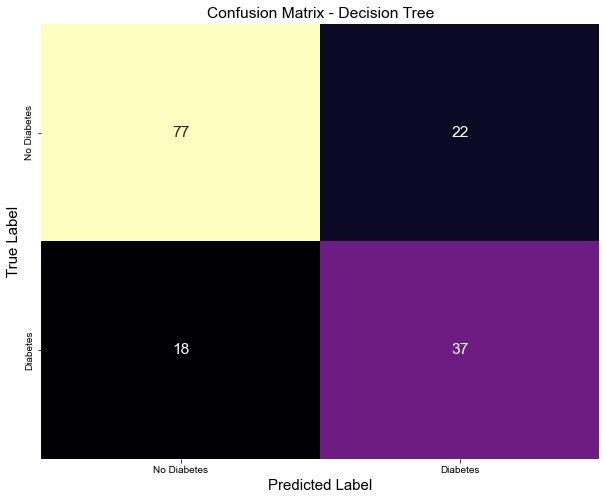

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicted values on the testing data
test_pred_decision_tree = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, test_pred_decision_tree)
print(f"Accuracy: {accuracy}")

# Confusion matrix
confusion_matrix = confusion_matrix(y_test, test_pred_decision_tree)
print("Confusion Matrix:")
print(confusion_matrix)

# Plot the confusion matrix
matrix_df = pd.DataFrame(confusion_matrix, index=['No Diabetes', 'Diabetes'], columns=['No Diabetes', 'Diabetes'])

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma", cbar=False)
ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()